# Cross Validation and Hyperparameter Tuning in Linear Regression

## Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Data Cleansing

### 50 Startups
#### Numeric

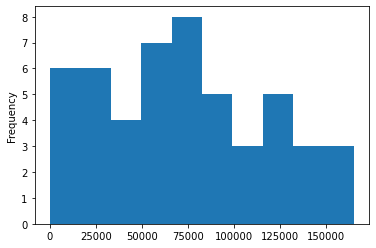

In [5]:
# Column R&D Spend
df['R&D Spend'].plot(kind='hist');

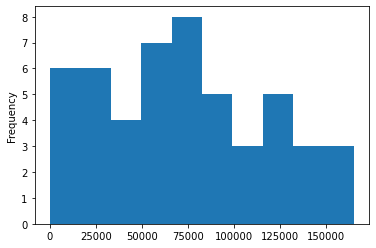

In [6]:
# Column Administration
df['R&D Spend'].plot(kind='hist');

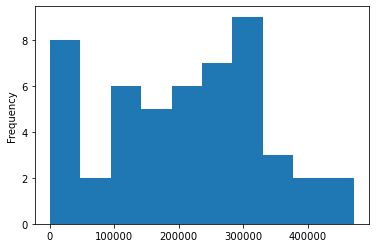

In [7]:
# Column Marketing Spend
df['Marketing Spend'].plot(kind='hist');

In [8]:
# State
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

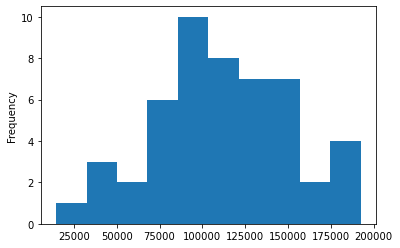

In [9]:
# Profit
df['Profit'].plot(kind='hist');

## Exploratory Data Analysis

In [10]:
# Describe
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
# State
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

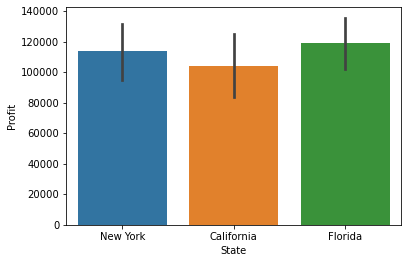

In [12]:
sns.barplot(x = 'State', y = 'Profit', data = df);

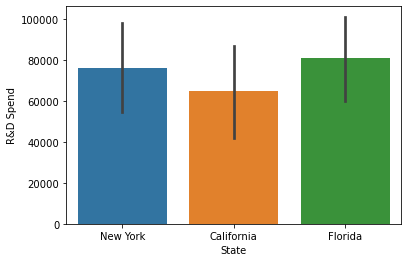

In [13]:
sns.barplot(x = 'State', y = 'R&D Spend', data = df);

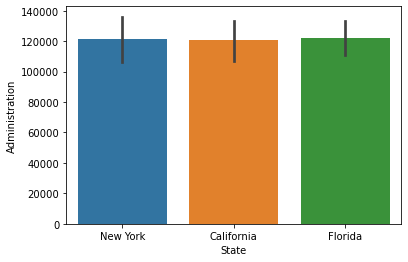

In [14]:
sns.barplot(x = 'State', y = 'Administration', data = df);

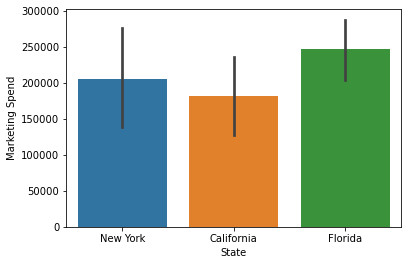

In [15]:
sns.barplot(x = 'State', y = 'Marketing Spend', data = df);

## Correlation

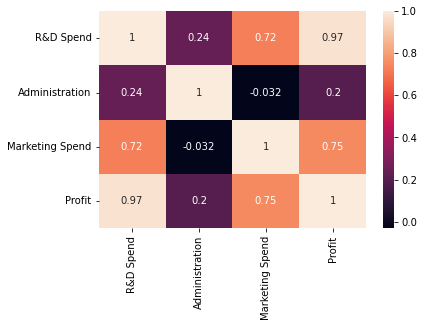

In [16]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot = True);

## Feature Engineering

In [17]:
State = pd.get_dummies(df['State'], prefix='State',drop_first=False)
df.drop(['State'],axis=1,inplace=True)
df = pd.concat([df,State], axis=1)

In [18]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [19]:
# MinMax Scaler
scaler = MinMaxScaler()

In [20]:
df['R&D Spend'] = scaler.fit_transform(df[['R&D Spend']])
df['Administration'] = scaler.fit_transform(df[['Administration']])
df['Marketing Spend'] = scaler.fit_transform(df[['Marketing Spend']])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.000000,0.651744,1.000000,192261.83,0,0,1
1,0.983359,0.761972,0.940893,191792.06,1,0,0
2,0.927985,0.379579,0.864664,191050.39,0,1,0
3,0.873136,0.512998,0.812235,182901.99,0,0,1
4,0.859438,0.305328,0.776136,166187.94,0,1,0


## Preprocessing Modeling

In [21]:
df.drop('Marketing Spend', axis=1, inplace = True) # multicolinear

In [22]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Machine Learning Regression - Simple Linear Regression

In [23]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [24]:
model.coef_

array([142350.2808635 ,  -6923.38921286,   -350.58805219,    740.51946624,
         -389.93141405])

In [25]:
for i,v in enumerate(model.coef_):
    print('Feature : %0d, score: %5f '%(i,v))

Feature : 0, score: 142350.280864 
Feature : 1, score: -6923.389213 
Feature : 2, score: -350.588052 
Feature : 3, score: 740.519466 
Feature : 4, score: -389.931414 


In [26]:
X.head()

,R&D Spend,Administration,State_California,State_Florida,State_New York
0,1.000000,0.651744,0,0,1
1,0.983359,0.761972,1,0,0
2,0.927985,0.379579,0,1,0
3,0.873136,0.512998,0,0,1
4,0.859438,0.305328,0,1,0


In [27]:
df.drop('Administration', axis=1, inplace = True)
df.drop('State_California', axis=1, inplace = True)
df.drop('State_New York', axis=1, inplace = True)

In [28]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred =  model.predict(X_test)

In [32]:
X.head()

,R&D Spend,State_Florida
0,1.000000,0
1,0.983359,0
2,0.927985,1
3,0.873136,0
4,0.859438,1


## Evaluate Model

In [33]:
mean_absolute_error(y_test, y_pred)

6290.45960484629

In [34]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.09237940361229963

## Building a Model With Cross Validation

- R square is a value that pays attention to how much the independent variable affects the dependent variable.

- If the value of R square is small, then the error component is large.

- If the value of R square is large, then the error component is small.

In [35]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv=3)
scores

array([0.96052255, 0.97121584, 0.84760897])

## Hyperparameter Tuning

Get default parameter

In [36]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
parameters = {"copy_X": [True, False],
             "fit_intercept": [True, False],
             "n_jobs": [None, -1],
             "normalize": [True, False],
             "positive": [True, False]
             }

search = RandomizedSearchCV(estimator = regressor, param_distributions = parameters, cv=3, scoring = "r2")

In [38]:
grid = GridSearchCV(estimator = model, param_grid = parameters, cv=3)

In [39]:
best_model = grid.fit(X_train, y_train)

Get best parameter

In [40]:
best_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': True}

## Building a Model With Hyperparameter Tuning

Model with best parameter

In [41]:
model_new = LinearRegression(positive = True, normalize = True, n_jobs = None, fit_intercept = True, copy_X = True)

Train with best parameter

In [42]:
regressor_new = model_new.fit(X_train, y_train)

In [43]:
y_pred_new = model_new.predict(X_test)

## Evaluate Model

In [44]:
mape_new = mean_absolute_percentage_error(y_test, y_pred_new)
mape_new

0.0923794036122996

Difference of mape

In [45]:
mape - mape_new

2.7755575615628914e-17

In [46]:
mape > mape_new

True